# Counting Money with Connected Components

In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.measure import label, regionprops
import numpy as np

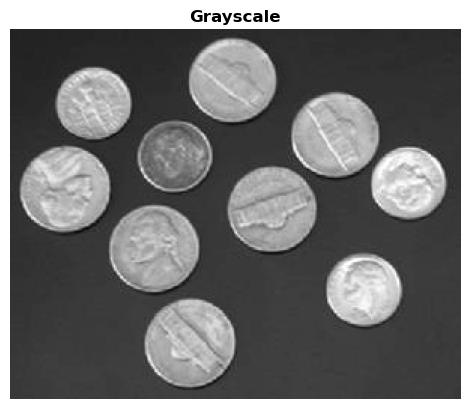

In [2]:
coins = cv2.imread("./images/coins.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(coins, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()

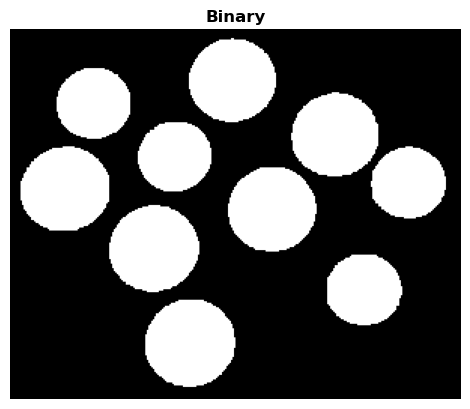

In [3]:
_, coins_binary = cv2.threshold(coins, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method
coins_binary = ndimage.binary_fill_holes(coins_binary)

plt.imshow(coins_binary, cmap='gray')
plt.title("Binary")
plt.axis('off')
plt.show()

We can filter connected components by size using [label()](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [regionprops()](https://scikit-image.org/docs/stable/api/skimage.measure.html#regionprops) functions.

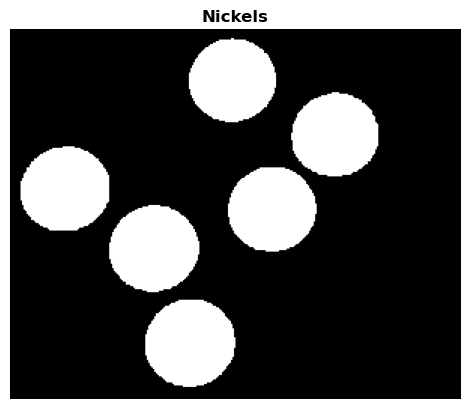

In [4]:
nickels = np.zeros_like(coins_binary)
label_image = label(coins_binary)

for region in regionprops(label_image):
    if 2000 < region.area < 3000:
        nickels[label_image == region.label] = 1

plt.imshow(nickels, cmap='gray')
plt.title("Nickels")
plt.axis('off')
plt.show()

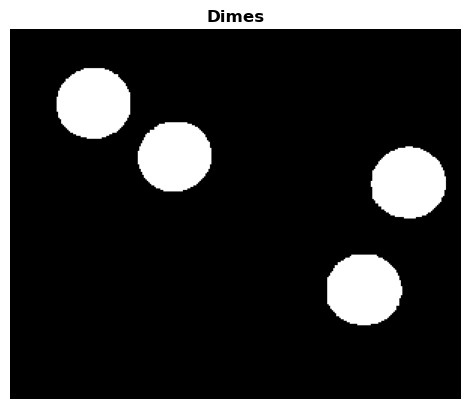

In [5]:
dimes =np.zeros_like(coins_binary)

for region in regionprops(label_image):
    if 0 < region.area < 2000:
        dimes[label_image == region.label] = 1

plt.imshow(dimes, cmap='gray')
plt.title("Dimes")
plt.axis('off')
plt.show()

The [label()](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) function returns information about the number of objects and the pixels that make up each component.

In [6]:
_, number_nickels = label(nickels, return_num=True)
_, number_dimes = label(dimes, return_num=True)

print("Number of nickels:", number_nickels)
print("Number of dimes:", number_dimes)

Number of nickels: 6
Number of dimes: 4


Now that we have the number of nickels and dimes, we can use this to calculate the amount of money. Nickels are worth $0.05, and dimes are worth $0.10.

In [8]:
total = number_nickels*0.05 + number_dimes*0.1

print(f"Amount of money = ${total:.2f}")

Amount of money = $0.70
